In [1]:
# Import libraries
import time
import numpy as np
from numpy import linalg as LA
import random
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## MA934

## Divide and conquer algorithms

### Estimating the computational complexity of numerical computations

### Big O notation

Given functions, $f(x)$ and $g(x)$, we say that $f(x) = \mathcal{O}(g(x))$ if there exist  $x_0$ and $K > 0$ such that

$$ \left| f(x) \right| \leq K\,g(x) $$

for all $x> x_0$.  
Used to describe an upper bound on the growth of a function, $f(x$), as its argument, $x$, tends to $\infty$.


### FLOPS and computational complexity 

FLOPS : Floating point operations per second

The *Computational complexity* of an algorithm is the rate at which the total number of operations (additions, multiplications, comparisons) required to solve a problem of size $n$ grows with $n$. 

We denote this number of operations by $F(n)$. 

The more efficient the algorithm, the slower the $F(n)$ grows with $n$. 

### Example : standard matrix multiplication

Consider calculating $C = A \, B$  where $A$ and $B$ are $n\times n$ matrices.  
Using the standard algorithm, the $i\,j$ entry of C is:

$$c_{i\,j} = \sum_{k=1}^n a_{i\,k}b_{k\,j}.$$

Needs $n$ multiplications and $n-1$ additions,  giving $2n-1$ ops in total. Since there are $n^2$ entries, the total number of ops required is $n^2\,(2 n -1)$.

Thus matrix multiplication has computational complexity $F(n) = \mathcal{O}(n^3)$.

### Aside : Benchmarking

We are ofted interested in accurately recording execution times and benchmarking in general. Let's check matrix multiplication:

In [2]:
import timeit

# function that computes the standard matrix-matrix multiplication
def MMStd(A, B):
    # Detect matrix size
    n = len(A)
    nSize = (n, n)
    # Initialise result matrix
    C = np.zeros(nSize)
    
    # Loop through the matrix elements
    for i in range(n):
        for j in range(n):     
            for k in range(n): 
                # Use standard multiplication formula
                C[i][j] += A[i][k]*B[k][j]
    return C

# This gives us the list of powers of two up to a specified amount
sizes = 2 ** np.arange(9)

# Initialise the list of runtimes with zeros
runtimes = [np.float32(0.0)] * 9

# Initialise an iterator to zero as well
j=0

for i in sizes:
    A = np.random.rand(i, i)
    B = np.random.rand(i, i)
    
    starttime = timeit.default_timer()
    CStd = MMStd(A, B)
    runtimes[j] = timeit.default_timer() - starttime
    j=j+1
    
# Exercise: what could go wrong with the above method? How would you improve it?

Let's plot the results:

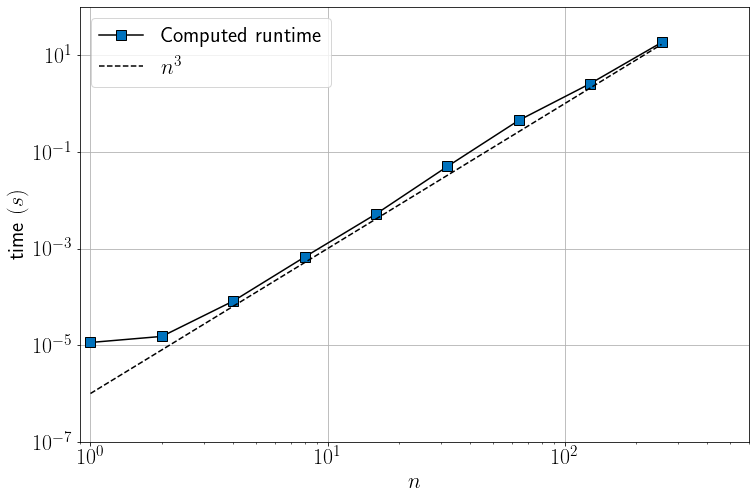

In [6]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))

plt.loglog(sizes, [i for i in runtimes], "-ks", label=r"Computed runtime", markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.loglog(sizes, 1e-6*np.power(sizes, 3.0), "--k", label=r"$n^3$")

plt.legend(loc="upper left")

plt.xlabel(r"$n$")
plt.ylabel(r"time $(s)$")
plt.xlim([0.9, 600])
plt.ylim([1e-7, 1e2])
plt.grid()
plt.show()

### A recursive approach to matrix multiplication

Assuming that $n=2^m$, divide $\mathbf{A}$, $\mathbf{B}$ and $\mathbf{C}$ into smaller matrices of size $\frac{n}{2} \times \frac{n}{2}$,
$$
\mathbf{A} = \left(
\begin{array}{cc}\mathbf{A}_{11}&\mathbf{A}_{12}\\
\mathbf{A}_{21}&\mathbf{A}_{22}
\end{array} \right)
\hspace{0.5cm}
\mathbf{B} = \left(
\begin{array}{cc}\mathbf{B}_{11}&\mathbf{B}_{12}\\
\mathbf{B}_{21}&\mathbf{B}_{22}
\end{array} \right)
\hspace{0.5cm}
\mathbf{C} = \left(
\begin{array}{cc}\mathbf{C}_{11}&\mathbf{C}_{12}\\
\mathbf{C}_{21}&\mathbf{C}_{22}
\end{array} \right)
$$
The matrices $C_{i\,j}$ are
$$
\nonumber \mathbf{C}_{11} = \mathbf{A}_{11}\mathbf{B}_{11}+\mathbf{A}_{12}\mathbf{B}_{21}\\
\nonumber \mathbf{C}_{12} = \mathbf{A}_{11}\mathbf{B}_{21}+\mathbf{A}_{12}\mathbf{B}_{22}\\
\label{eq-DC1} \mathbf{C}_{21} = \mathbf{A}_{21}\mathbf{B}_{11}+\mathbf{A}_{22}\mathbf{B}_{21}\\
\nonumber \mathbf{C}_{22} = \mathbf{A}_{21}\mathbf{B}_{21}+\mathbf{A}_{22}\mathbf{B}_{22}.
$$

### Divide and conquer strategy

Multiplication of $n \times n$ matrices can be expressed as multiplication (and addition) of $\frac{n}{2} \times \frac{n}{2}$ matrices. Recursion leads to trivial $1 \times 1$ matrices.  

This is an example of what is called a "divide and conquer" strategy. 

![Float32](files/images/recursionTree.jpg)

**Divide-and-conquer**: break a problem into smaller subproblems of the same type, recursively solve the subproblems, and finally combine the solutions.

### Computational complexity of recursive matrix multiplication

Is the recursive strategy better or worse than the iterative one?

Let $F(n)$ be the ops required to multiply 2 matrices of size $n \times n$.  
We must have

$$ F(n) =  8\, F\left(\frac{n}{2}\right) + 4\,\left(\frac{n}{2}\right)^2, $$

since we have to do 8 multiplications and 4 additions of size $\frac{n}{2}$.

When the recursion reaches $n=1$, we have $F(1) = 1$.



### Solving for $F(n)$

How do we solve such equations?  
Trick: let  
> $n = 2^p$  
> $a_p = F(2^p).$ 

This gives a linear first order recursion relation
$$ a_p = 8\, a_{p-1} + 2^{2p}$$ 

with $a_0 = 1$.

The solution is
$$a_p = 2^{2p}\left(2^{p+1}-1 \right).$$
Returning to the original variables: $p = \log_2 n$.

$$ F(n) = n^2 \left(2n - 1 \right).$$

In this case, the divide and conquer strategy gives the same answer as the iterative strategy ... but this is not always the case.

### The "Master Theorem"

Let $a$ and $b$ be integers greater than or equal to 1 (usually $b=2$). Let $c$ and $d$ be positive and real. 

Given a recurrence relation of the form
$$
F(n) = \left\{
\begin{array}{ll}
a\, F(n/b) + n^c&\mbox{if $n>1$}\\
d&\mbox{if $n=1$,}
\end{array}
\right.
$$
then if $n$ is a power of $b$, there are three cases:
1. if $\log_b(a) < c$ then $F(n) = O(n^c)$
2. if $\log_b(a) = c$ then $F(n) = O(n^c \log(n))$
3. if $\log_b(a) > c$ then $F(n) = O(n^{\log_b(a)})$.

### Matrix multiplication again: Strassen's algorithm

An alternative (very non-obvious) divide and conquer strategy is:

$$
\begin{array}{ll}
\mathbf{C}_{11} = \mathbf{M}_{1}+\mathbf{M}_{4}-\mathbf{M}_{5}+\mathbf{M}_{7} & \mathbf{C}_{12} =\mathbf{M}_{3}+\mathbf{M}_{5}\\
\mathbf{C}_{21} = \mathbf{M}_{2}+\mathbf{M}_{4} & \mathbf{C}_{22} = \mathbf{M}_{1}-\mathbf{M}_{2}+\mathbf{M}_{3}+\mathbf{M}_{6},
\end{array}
$$

where $\mathbf{M}_1$ to $\mathbf{M}_7$ are

$$
\begin{array}{ll}
\mathbf{M}_{1} = \left(\mathbf{A}_{11}+\mathbf{A}_{22}\right)\left(\mathbf{B}_{11}+\mathbf{B}_{22}\right) &
\mathbf{M}_{2} = \left(\mathbf{A}_{21}+\mathbf{A}_{22}\right) \mathbf{B}_{11}\\
\mathbf{M}_{3} = \mathbf{A}_{11} \left(\mathbf{B}_{12}-\mathbf{B}_{22}\right)&
\mathbf{M}_{4} =  \mathbf{A}_{22} \left(\mathbf{B}_{21}-\mathbf{B}_{11}\right)\\
\mathbf{M}_{5} =  \left(\mathbf{A}_{11}+\mathbf{A}_{12}\right) \mathbf{B}_{22}&
\mathbf{M}_{6} = \left(\mathbf{A}_{21}-\mathbf{A}_{11}\right)\left(\mathbf{B}_{11}+\mathbf{B}_{12}\right)\\
\mathbf{M}_{7} =  \left(\mathbf{A}_{12}-\mathbf{A}_{22}\right)\left(\mathbf{B}_{21}+\mathbf{B}_{22}\right)&
 .
\end{array}
$$

### Computational complexity of Strassen multiplication

These crazy formulae were dreamt up by Strassen (1969). The key point is that there are only 7 multiplications rather than 8. We have:
$$ F(n) = 7\,F\left(\frac{n}{2}\right) + 18\,\left(\frac{n}{2}\right)^2$$,
with $F(1)=1$. The solution is

$$ F(n) = 7 n^{\log_2(7)} - 6 n^2 = \mathcal{O}(n^{\log_2(7)}).$$

Check that this is consistent with the master theorem.

Note that $\log_2(7) \approx 2.807 < 3$. Amazing!

### Solving linear recursion relations

We don't need to memorise the master theorem: linear recursion relations are very similar to linear differential equations.

1st order case:
$$a_{n} = b_1\, a_{n-1} + f(n)\ \ \ \ \  \text{with initial condition}\ \  a_1 = A_1.$$ 
2nd order case:
$$a_{n} = b_1\, a_{n-1}+ b_2\, a_{n-2} + f(n)\ \ \ \ \  \text{with initial conditions}\ \  a_1 = A_1,\ a_2=A_2 $$ 

Solution procedure is the same in both cases:



### Solving linear recursion relations
1. Find the *general solution* of the homogeneous equation,
$$ a_{n} = b_1\, a_{n-1}\ \ \  \text{or}\ \ \ a_{n} = b_1\, a_{n-1}+ b_2\, a_{n-2}$$
with the ansatz $a_n = x^n$.  
The solution will usually be of the form
$$ a_n = C_1\,x^n\ \ \text{or}\ \ a_{n} = C_1\,x_1^n + C_2\,x_2^n,$$
where the $C$'s are arbitrary constants.
2. Find a *particular solution*, $\alpha_n$, of the inhomogeneous equation.
3. The full solution is
$$ a_n = C_1\,x^n +\alpha_n\ \ \text{or}\ \ a_{n} = C_1\,x_1^n + C_2\,x_2^n + \alpha_n,$$
Use the initial conditions to evaluate the constants, $C$.

### Solving linear recursion relations
The tricky part is step 2 - need to "guess" a particular solution.

A good guess is often a term, $\text{const} \times f(n)$, proportional to $f(n)$ (or sometimes a polynomial in $f(n)$).

As for resonant ODEs, it can happen that the solution of the homogeneous equation is already proportional to $f(n)$

In this case a good guess for the particular solution is $\text{const}\times n\,f(n)$.

See the excellent online notes available __[here](https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm)__.